## *Backpack Price Prediction | Feature Engineering + XGBoost + RMSE Optimization*

![](https://www.kaggle.com/competitions/90274/images/header)

# *🎒 Backpack Price Prediction*  
### *Kaggle Playground Series - Season 5, Episode 2*  

## *📌 Problem*
The goal of this competition is to predict backpack prices using various product attributes.

## *🎯 Evaluation Metric*
Root Mean Squared Error (RMSE)

## *🧠 Approach*
- Missing value handling
- Feature encoding
- Model comparison with Cross Validation
- Best model selection (Gradient Boosting)
- Final model training on full dataset
- Model & feature saving for deployment

## *🏆 Best Model*
GradientBoostingRegressor  
CV RMSE ≈ 38.99


## *Import*

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 55)  
# Pandas DataFrame çıktılarında tüm sütunların görünmesini sağlar.

import warnings
warnings.filterwarnings('ignore')  
# Uyarıları gizler, böylece kod çalışırken kullanıcıyı rahatsız etmez.

from sklearn.linear_model import LinearRegression, Ridge, Lasso
# LinearRegression: Doğrusal regresyon modelini kullanır.
# Ridge: L2 regularizasyonu ile doğrusal regresyon.
# Lasso: L1 regularizasyonu ile doğrusal regresyon.

from sklearn.model_selection import train_test_split
# Veriyi eğitim ve test setlerine ayırır.

from sklearn.metrics import r2_score, mean_squared_error
# r2_score: Modelin açıklama gücünü ölçer.
# mean_squared_error: Modelin hata oranını ölçer, kareler ortalaması hatası.

import numpy as np  # NumPy, matematiksel ve matris işlemleri için kullanılır.

import matplotlib.pyplot as plt 
# Veriyi görselleştirmek için grafikler çizen kütüphane.

import seaborn as sns 
# Veri görselleştirme kütüphanesi, genellikle daha estetik ve kompleks grafikler oluşturur.

## *Read Data*

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s5e2/sample_submission.csv
/kaggle/input/playground-series-s5e2/train.csv
/kaggle/input/playground-series-s5e2/test.csv
/kaggle/input/playground-series-s5e2/training_extra.csv


In [3]:
df = pd.read_csv('/kaggle/input/playground-series-s5e2/train.csv')  
# '/kaggle/input/playground-series-s5e2/train.csv' dosyasını okur ve DataFrame (df) olarak yükler.

## *Exploratory Data Analysis*

In [4]:
df.head()  
# DataFrame'in ilk 5 satırını gösterir. Veri yapısının hızlıca gözlemlenmesi için kullanılır.

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [5]:
df.tail()  
# DataFrame'in son 5 satırını gösterir. Verinin son kısmına bakmak için kullanılır.

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
299995,299995,Adidas,Leather,Small,9.0,No,No,Tote,Blue,12.730812,129.99749
299996,299996,Jansport,Leather,Large,6.0,No,Yes,Tote,Blue,26.633182,19.85819
299997,299997,Puma,Canvas,Large,9.0,Yes,Yes,Backpack,Pink,11.898250,111.41364
299998,299998,Adidas,Nylon,Small,1.0,No,Yes,Tote,Pink,6.175738,115.89080
299999,299999,Under Armour,Canvas,Small,2.0,No,Yes,Backpack,Black,18.568865,26.72762


In [6]:
df.describe()  
# Sayısal sütunlar için temel istatistiksel bilgileri (ortalama, standart sapma, min, max vs.) döker.

,id,Compartments,Weight Capacity (kg),Price
count,300000.000000,300000.000000,299862.000000,300000.000000
mean,149999.500000,5.443590,18.029994,81.411107
std,86602.684716,2.890766,6.966914,39.039340
min,0.000000,1.000000,5.000000,15.000000
25%,74999.750000,3.000000,12.097867,47.384620
50%,149999.500000,5.000000,18.068614,80.956120
75%,224999.250000,8.000000,24.002375,115.018160
max,299999.000000,10.000000,30.000000,150.000000


In [7]:
df.info()  
# DataFrame hakkında genel bilgi verir (sütun isimleri, veri tipi, boş değer sayısı vb.).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


In [8]:
df.isnull().sum()  
# Hangi sütunlarda kaç tane eksik (null) değer olduğunu sayar.

id                         0
Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

In [9]:
df.corr(numeric_only=True)  
# Sayısal sütunlar arasındaki korelasyonları hesaplar. Veriler arasındaki ilişkiyi görmek için kullanılır.

,id,Compartments,Weight Capacity (kg),Price
id,1.000000,0.000982,-0.001015,0.002027
Compartments,0.000982,1.000000,0.002542,-0.000131
Weight Capacity (kg),-0.001015,0.002542,1.000000,0.018018
Price,0.002027,-0.000131,0.018018,1.000000


In [10]:
df.shape  
# DataFrame'in boyutlarını (satır sayısı, sütun sayısı) döker.

(300000, 11)

## *Missing Data*

In [11]:
# Kolonları ayır
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

In [12]:
# id ve target hariç tut
num_cols = num_cols.drop(["id", "Price"])

In [13]:
# Eksik doldurma
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna("Unknown")

In [16]:
# Kontrol
df.isnull().sum().sum()

np.int64(0)

## *Data Visualization*

In [17]:
sns.set_style("whitegrid")

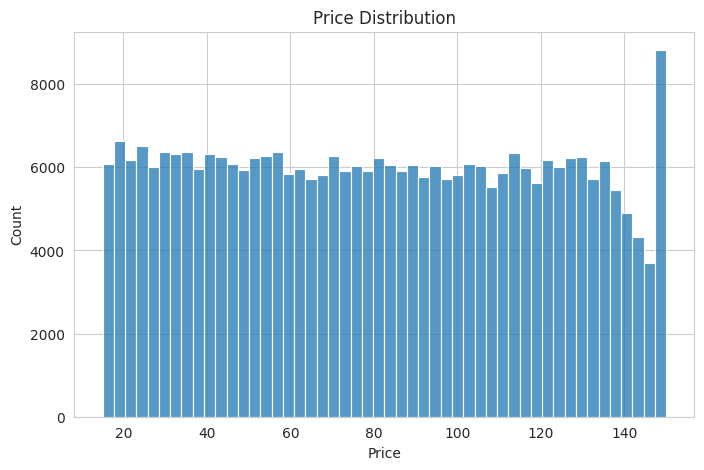

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df["Price"], bins=50)
plt.title("Price Distribution")
plt.show()

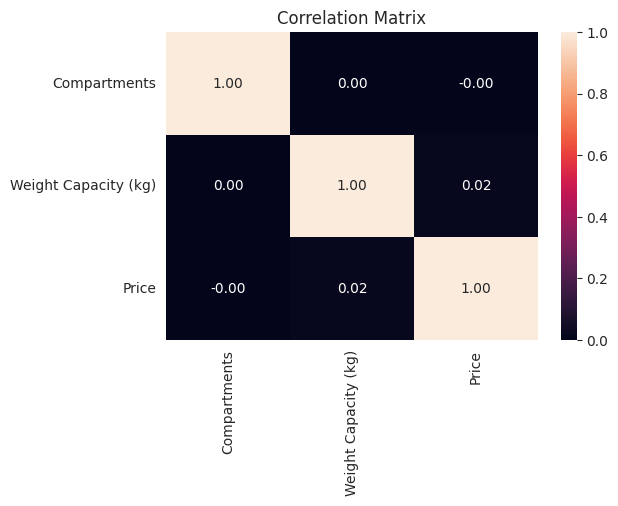

In [19]:
plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols.tolist() + ["Price"]].corr(),
            annot=True,
            fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

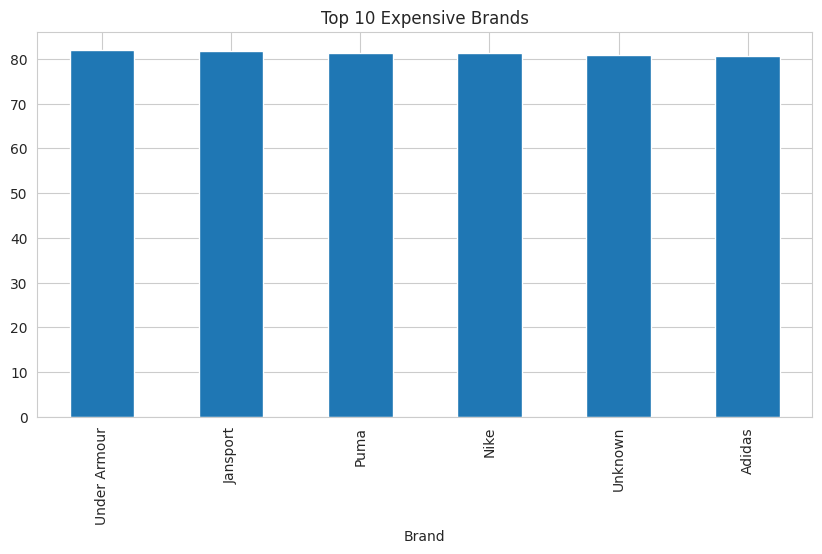

In [20]:
plt.figure(figsize=(10,5))
df.groupby("Brand")["Price"].mean().sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Top 10 Expensive Brands")
plt.show()

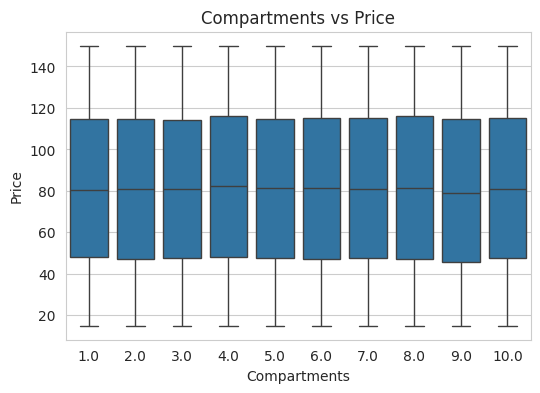

In [21]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Compartments", y="Price", data=df)
plt.title("Compartments vs Price")
plt.show()

In [22]:
import numpy as np
print("Skew:", df["Price"].skew())

Skew: 0.036882755131099065


## *Modelling*

In [23]:
y = df["Price"]
x = df.drop(columns=["Price", "id"])

In [24]:
x = pd.get_dummies(x, drop_first=True)  
# Kategorik değişkenleri (örneğin 'zipcode') one-hot encoding yöntemiyle sayısal değerlere dönüştürür.  
# drop_first=True, çoklu doğrusal bağımlılığı (dummy trap) önlemek için ilk kategoriyi kaldırır.

In [25]:
 x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.20, random_state=42
    )

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np

def algo_test(x, y):
    
    scaler = MinMaxScaler()
    x_scaled = scaler.fit_transform(x)

    models = {
        "Linear": LinearRegression(),
        "Ridge": Ridge(),
        "Lasso": Lasso(),
        "ElasticNet": ElasticNet(),
        "GradientBoosting": GradientBoostingRegressor(),
        "DecisionTree": DecisionTreeRegressor(),
        "XGB": XGBRegressor(
            n_estimators=500,
            learning_rate=0.05,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            tree_method="hist"
        )
    }

    results = []

    for name, model in models.items():
        
        if name in ["Linear","Ridge","Lasso","ElasticNet"]:
            scores = cross_val_score(model, x_scaled, y,
                                     cv=5,
                                     scoring="neg_root_mean_squared_error")
        else:
            scores = cross_val_score(model, x, y,
                                     cv=5,
                                     scoring="neg_root_mean_squared_error")
        
        rmse = -scores.mean()
        
        results.append([name, rmse])

    return pd.DataFrame(results, columns=["Model","CV_RMSE"]).sort_values("CV_RMSE")


In [37]:
results = algo_test(x, y)
results

,Model,CV_RMSE
4,GradientBoosting,38.997472
1,Ridge,39.013848
0,Linear,39.013848
2,Lasso,39.039331
3,ElasticNet,39.039331
6,XGB,39.074500
5,DecisionTree,55.861768


## *Best Model*

In [38]:
final_model = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

In [39]:
final_model.fit(x, y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=500,
                          random_state=42)

## *Save Model*

In [40]:
import joblib

# Modeli kaydet
joblib.dump(final_model, "final_model.pkl")

['final_model.pkl']

In [41]:
# Feature listesini kaydet
joblib.dump(list(x.columns), "model_features.pkl")

['model_features.pkl']

# *✅ Final Model Summary*

- Best Model: GradientBoostingRegressor
- Cross Validation: 5-Fold
- Evaluation Metric: RMSE
- Final Model trained on full dataset
- Model saved as: `final_model.pkl`
- Feature list saved as: `model_features.pkl`

## *🚀 Deployment Ready*
The model is exported and ready for:
- HuggingFace Space (Streamlit)
- Local deployment
- API integration

Thank you for reviewing this notebook 🙌
